# Section 1: Applied Mathematics for Data Science & AI
## Notebook 2: Probability Distributions & Hypothesis Testing

In this notebook, you'll:
- Understand key probability distributions used in ML & statistics.
- Simulate data to build intuition about distribution properties.
- Perform hypothesis testing and interpret p-values & confidence intervals.
---

## 1. Probability Distributions

**Why it matters:**
- Many ML algorithms assume data follows a certain distribution (e.g., Gaussian noise).
- Understanding distributions is critical for statistical inference and generative models.

We'll explore both discrete and continuous distributions.
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)

### Discrete Distributions: Bernoulli, Binomial, Poisson

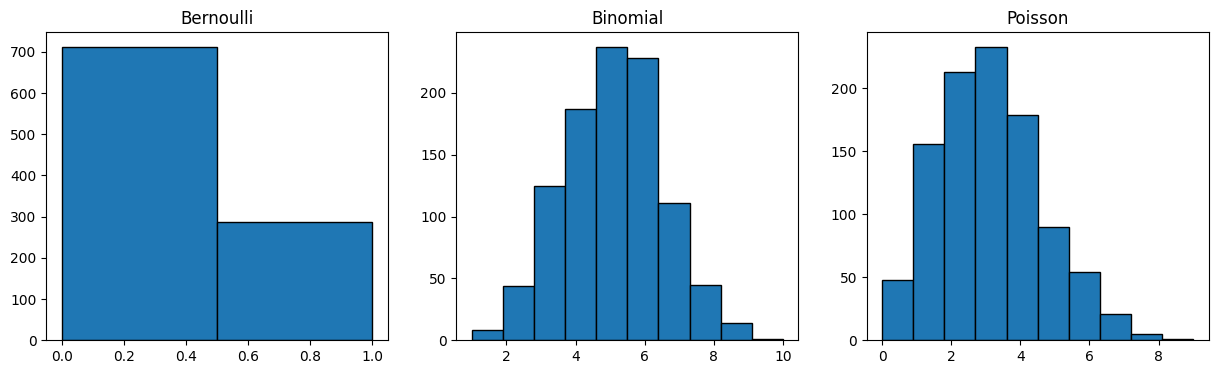

In [2]:
# Bernoulli (single trial, p=0.3)
bernoulli = stats.bernoulli(p=0.3)
samples_bernoulli = bernoulli.rvs(size=1000)

# Binomial (n=10 trials, p=0.5)
binomial = stats.binom(n=10, p=0.5)
samples_binomial = binomial.rvs(size=1000)

# Poisson (lambda=3)
poisson = stats.poisson(mu=3)
samples_poisson = poisson.rvs(size=1000)

# Plot histograms
fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].hist(samples_bernoulli, bins=2, edgecolor='black'); axs[0].set_title('Bernoulli')
axs[1].hist(samples_binomial, bins=10, edgecolor='black'); axs[1].set_title('Binomial')
axs[2].hist(samples_poisson, bins=10, edgecolor='black'); axs[2].set_title('Poisson')
plt.show()

### Exercise 1:
- Change parameters (p, n, λ) for the distributions and observe how histograms change.
- Compare the mean and variance from samples with theoretical values.

=== PARAMETER EXPLORATION ===
1. Bernoulli Distribution:
  Bernoulli(p=0.1): Sample mean=0.106, Theoretical=0.1
  Bernoulli(p=0.5): Sample mean=0.477, Theoretical=0.5
  Bernoulli(p=0.9): Sample mean=0.913, Theoretical=0.9


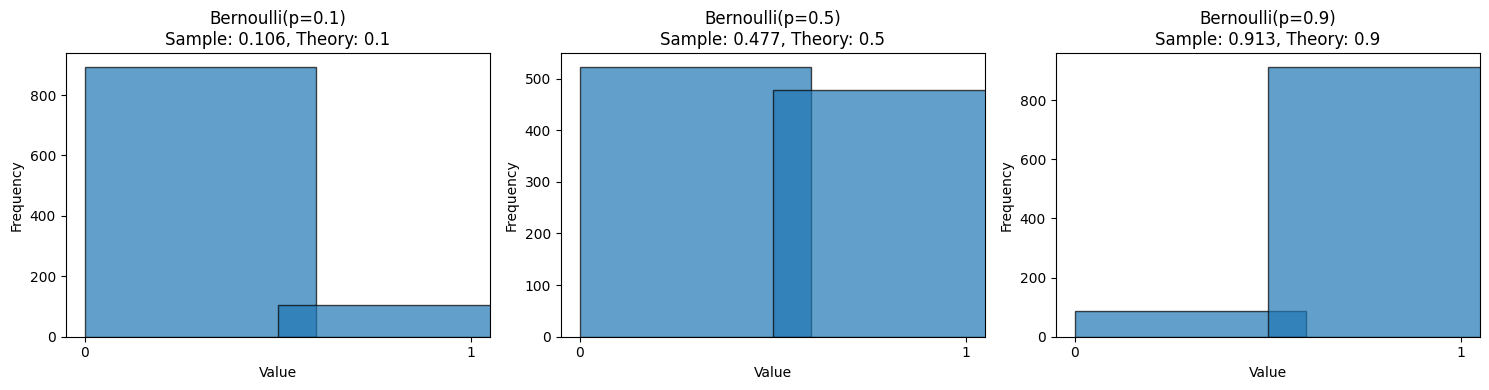


2. Binomial Distribution:
  Binomial(n=20, p=0.7): Sample mean=13.97, Theoretical=14.00
    Sample var=4.20, Theoretical var=4.20


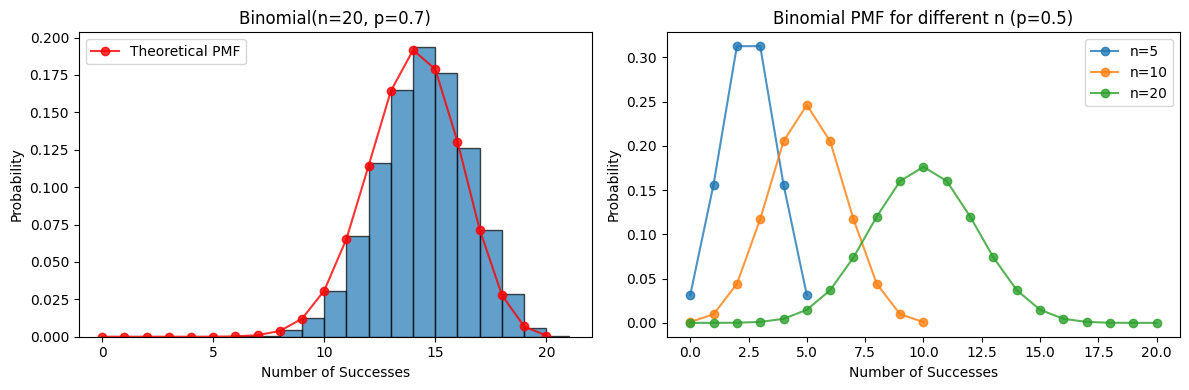


3. Poisson Distribution:
  Poisson(λ=5): Sample mean=5.01, Theoretical=5.00
    Sample var=4.99, Theoretical var=5.00


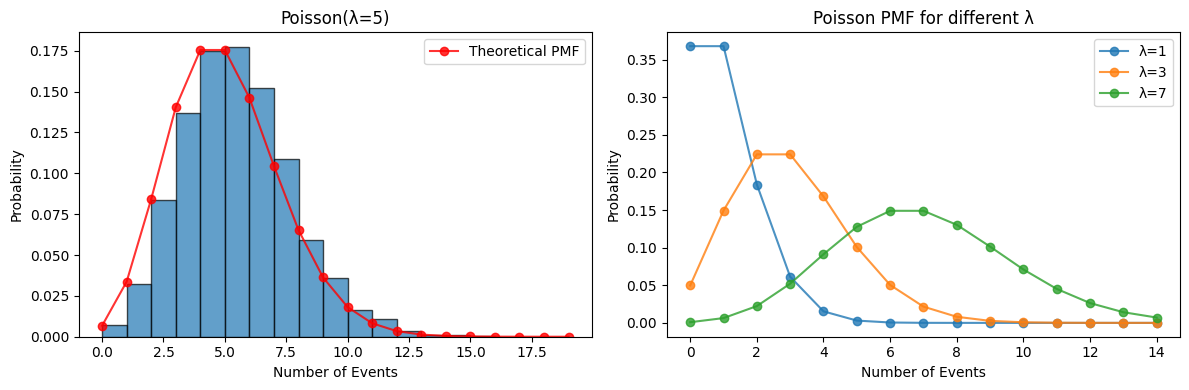


4. Poisson as Binomial Limit:
When n is large and p is small, Binomial(n,p) ≈ Poisson(λ=np)


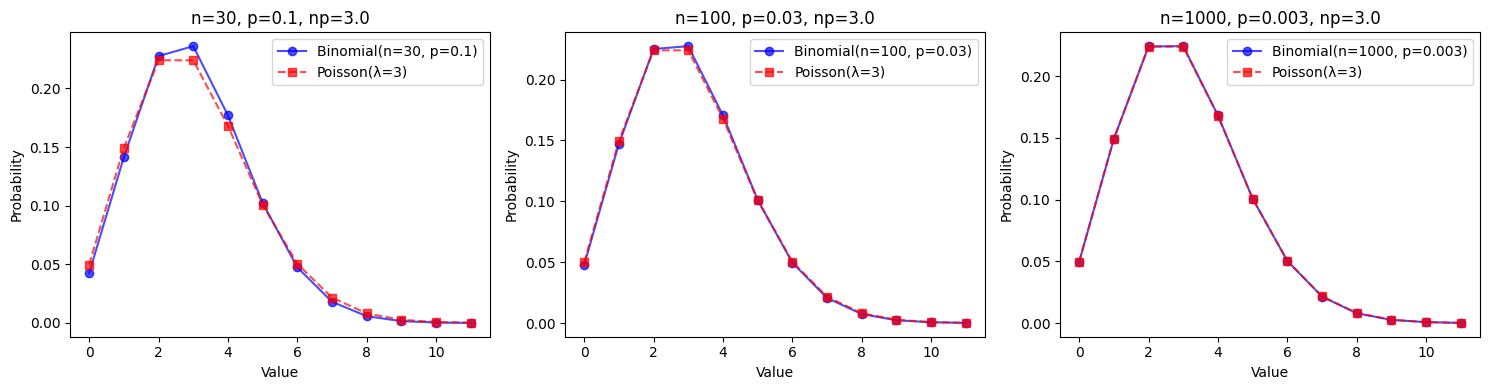


Key Insights:
• Bernoulli: As p increases, more 1s appear
• Binomial: Mean = np, Variance = np(1-p)
• Poisson: Mean = Variance = λ
• Poisson approximates Binomial when n↑, p↓, np=constant


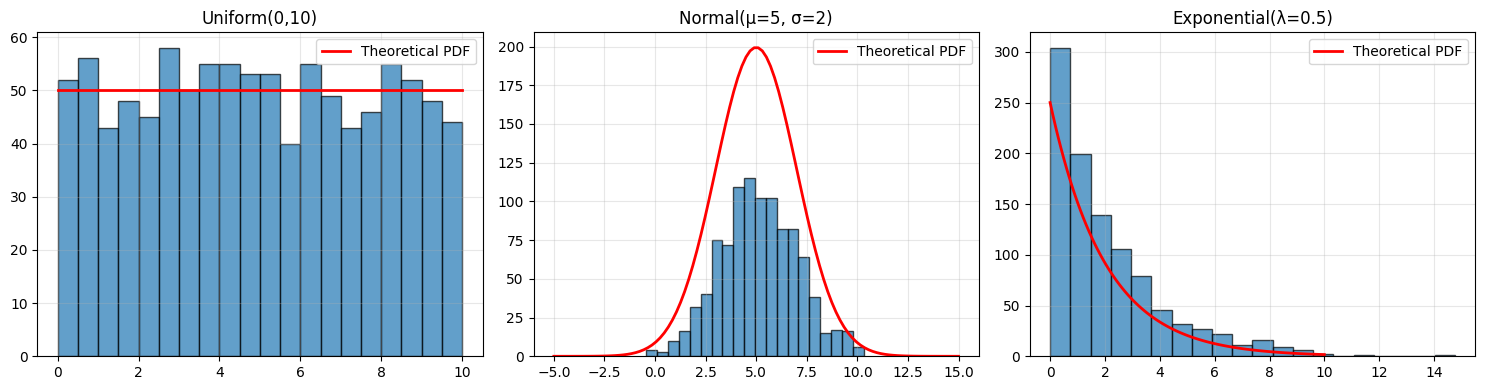

Continuous Distribution Properties:
Uniform: Sample mean=4.93, Theoretical=5.0
Normal:  Sample mean=5.13, Theoretical=5.0
Exponential: Sample mean=2.12, Theoretical=2.0


In [3]:
# Exercise 1: Parameter exploration and theoretical comparison

print("=== PARAMETER EXPLORATION ===")

# 1. Bernoulli with different p values (with visualization)
print("1. Bernoulli Distribution:")
plt.figure(figsize=(15, 4))
for i, p in enumerate([0.1, 0.5, 0.9]):
    bern = stats.bernoulli(p=p)
    samples = bern.rvs(size=1000)
    
    plt.subplot(1, 3, i+1)
    plt.hist(samples, bins=2, alpha=0.7, edgecolor='black', width=0.6)
    plt.title(f'Bernoulli(p={p})\nSample: {np.mean(samples):.3f}, Theory: {p}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])
    
    print(f"  Bernoulli(p={p}): Sample mean={np.mean(samples):.3f}, Theoretical={p}")

plt.tight_layout()
plt.show()

print()

# 2. Binomial with your parameters plus comparison
print("2. Binomial Distribution:")
plt.figure(figsize=(12, 4))

# Your enhanced example
n, p = 20, 0.7
binomial = stats.binom(n=n, p=p)
samples_binomial = binomial.rvs(size=10000)
sample_mean = np.mean(samples_binomial)
sample_var = np.var(samples_binomial)

plt.subplot(1, 2, 1)
plt.hist(samples_binomial, bins=range(n+2), alpha=0.7, edgecolor='black', density=True)
x = np.arange(0, n+1)
plt.plot(x, binomial.pmf(x), 'ro-', alpha=0.8, label='Theoretical PMF')
plt.title(f'Binomial(n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()

print(f"  Binomial(n={n}, p={p}): Sample mean={sample_mean:.2f}, Theoretical={binomial.mean():.2f}")
print(f"    Sample var={sample_var:.2f}, Theoretical var={binomial.var():.2f}")

# Compare different n values
plt.subplot(1, 2, 2)
for n_comp in [5, 10, 20]:
    binom_comp = stats.binom(n=n_comp, p=0.5)
    x_comp = np.arange(0, n_comp+1)
    plt.plot(x_comp, binom_comp.pmf(x_comp), 'o-', alpha=0.8, label=f'n={n_comp}')

plt.title('Binomial PMF for different n (p=0.5)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()
plt.show()

print()

# 3. Poisson with your parameters plus comparisons
print("3. Poisson Distribution:")
plt.figure(figsize=(12, 4))

# Your enhanced example
lam = 5
poisson = stats.poisson(mu=lam)
samples_poisson = poisson.rvs(size=10000)

plt.subplot(1, 2, 1)
plt.hist(samples_poisson, bins=range(0, 20), alpha=0.7, edgecolor='black', density=True)
x = np.arange(0, 20)
plt.plot(x, poisson.pmf(x), 'ro-', alpha=0.8, label='Theoretical PMF')
plt.title(f'Poisson(λ={lam})')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()

print(f"  Poisson(λ={lam}): Sample mean={np.mean(samples_poisson):.2f}, Theoretical={poisson.mean():.2f}")
print(f"    Sample var={np.var(samples_poisson):.2f}, Theoretical var={poisson.var():.2f}")

# Compare different lambda values
plt.subplot(1, 2, 2)
for lam_comp in [1, 3, 7]:
    pois_comp = stats.poisson(mu=lam_comp)
    x_comp = np.arange(0, 15)
    plt.plot(x_comp, pois_comp.pmf(x_comp), 'o-', alpha=0.8, label=f'λ={lam_comp}')

plt.title('Poisson PMF for different λ')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()
plt.show()

print()

# 4. Key insight: Poisson as limit of Binomial
print("4. Poisson as Binomial Limit:")
print("When n is large and p is small, Binomial(n,p) ≈ Poisson(λ=np)")

lam_target = 3
comparisons = [(30, 0.1), (100, 0.03), (1000, 0.003)]

plt.figure(figsize=(15, 4))
for i, (n, p) in enumerate(comparisons):
    binom = stats.binom(n=n, p=p)
    pois = stats.poisson(mu=lam_target)
    
    plt.subplot(1, 3, i+1)
    x = np.arange(0, 12)
    plt.plot(x, binom.pmf(x), 'b-o', alpha=0.7, label=f'Binomial(n={n}, p={p})')
    plt.plot(x, pois.pmf(x), 'r--s', alpha=0.7, label=f'Poisson(λ={lam_target})')
    plt.title(f'n={n}, p={p}, np={n*p}')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Key Insights:")
print("• Bernoulli: As p increases, more 1s appear")
print("• Binomial: Mean = np, Variance = np(1-p)")
print("• Poisson: Mean = Variance = λ")
print("• Poisson approximates Binomial when n↑, p↓, np=constant")

# 5. Continuous Distributions: Uniform, Normal, Exponential
uniform = stats.uniform(loc=0, scale=10)  # uniform between 0 and 10
samples_uniform = uniform.rvs(size=1000)

normal = stats.norm(loc=5, scale=2)  # mean=5, std=2
samples_normal = normal.rvs(size=1000)

exponential = stats.expon(scale=2)  # rate=1/2
samples_exponential = exponential.rvs(size=1000)

# Plot histograms
fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].hist(samples_uniform, bins=20, edgecolor='black', alpha=0.7); axs[0].set_title('Uniform(0,10)')
axs[1].hist(samples_normal, bins=20, edgecolor='black', alpha=0.7); axs[1].set_title('Normal(μ=5, σ=2)')
axs[2].hist(samples_exponential, bins=20, edgecolor='black', alpha=0.7); axs[2].set_title('Exponential(λ=0.5)')

# Add theoretical curves
x_uniform = np.linspace(0, 10, 100)
x_normal = np.linspace(-5, 15, 100)
x_exp = np.linspace(0, 10, 100)

axs[0].plot(x_uniform, uniform.pdf(x_uniform) * 1000 * (10/20), 'r-', linewidth=2, label='Theoretical PDF')
axs[1].plot(x_normal, normal.pdf(x_normal) * 1000 * (20/20), 'r-', linewidth=2, label='Theoretical PDF')
axs[2].plot(x_exp, exponential.pdf(x_exp) * 1000 * (10/20), 'r-', linewidth=2, label='Theoretical PDF')

for ax in axs:
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Continuous Distribution Properties:")
print(f"Uniform: Sample mean={np.mean(samples_uniform):.2f}, Theoretical=5.0")
print(f"Normal:  Sample mean={np.mean(samples_normal):.2f}, Theoretical=5.0")
print(f"Exponential: Sample mean={np.mean(samples_exponential):.2f}, Theoretical=2.0")

### Continuous Distributions: Uniform, Normal, Exponential

In [4]:
# Exercise 2: Hypothesis testing variations

print("=== HYPOTHESIS TESTING VARIATIONS ===")

# 1. Effect of sample size on statistical power
print("1. Sample Size Impact:")
effect_size = 0.3  # Fixed effect size
for n in [20, 50, 200]:
    group_A = np.random.normal(0, 1, n)
    group_B = np.random.normal(effect_size, 1, n)
    t_stat, p_val = stats.ttest_ind(group_A, group_B)
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    print(f"  n={n:3d}: t={t_stat:6.3f}, p={p_val:.4f} {significance}")

print()

# 2. Effect of mean difference (effect size)
print("2. Effect Size Impact:")
n_fixed = 100
for effect in [0.1, 0.3, 0.5, 0.8]:
    group_A = np.random.normal(0, 1, n_fixed)
    group_B = np.random.normal(effect, 1, n_fixed)
    t_stat, p_val = stats.ttest_ind(group_A, group_B)
    cohen_d = effect / 1  # Cohen's d = (mean1 - mean2) / pooled_std
    print(f"  Effect={effect:.1f} (Cohen's d={cohen_d:.1f}): t={t_stat:.3f}, p={p_val:.4f}")

print()

# 3. Paired vs Independent t-tests
print("3. Paired vs Independent Tests:")
# Create correlated data (before/after treatment)
before = np.random.normal(100, 15, 30)
treatment_effect = np.random.normal(5, 3, 30)  # Individual variation in response
after = before + treatment_effect

# Independent t-test (ignores pairing)
t_ind, p_ind = stats.ttest_ind(before, after)
# Paired t-test (accounts for correlation)
t_rel, p_rel = stats.ttest_rel(before, after)

print(f"  Independent t-test: t={t_ind:.3f}, p={p_ind:.4f}")
print(f"  Paired t-test:      t={t_rel:.3f}, p={p_rel:.4f}")
print(f"  Correlation between groups: r={np.corrcoef(before, after)[0,1]:.3f}")

print()

# 4. Parametric vs Non-parametric tests
print("4. Parametric vs Non-parametric Tests:")
# Create skewed (non-normal) data
group_A_skewed = np.random.exponential(1, 100)
group_B_skewed = np.random.exponential(1.5, 100)

# Parametric test (assumes normality)
t_param, p_param = stats.ttest_ind(group_A_skewed, group_B_skewed)
# Non-parametric test (no normality assumption)
u_stat, p_nonparam = stats.mannwhitneyu(group_A_skewed, group_B_skewed, alternative='two-sided')

print(f"  Parametric (t-test):     t={t_param:.3f}, p={p_param:.4f}")
print(f"  Non-parametric (U-test): U={u_stat:.1f}, p={p_nonparam:.4f}")

# Check normality with Shapiro-Wilk test
_, p_norm_A = stats.shapiro(group_A_skewed[:50])  # Limited to 50 samples for shapiro
_, p_norm_B = stats.shapiro(group_B_skewed[:50])
print(f"  Normality test p-values: Group A: {p_norm_A:.4f}, Group B: {p_norm_B:.4f}")

print()

# 5. Multiple comparisons and Type I error
print("5. Multiple Comparisons (Type I Error Inflation):")
np.random.seed(42)
significant_tests = 0
n_tests = 20

for i in range(n_tests):
    # All groups from same distribution (H0 is true)
    group1 = np.random.normal(0, 1, 30)
    group2 = np.random.normal(0, 1, 30)
    _, p_val = stats.ttest_ind(group1, group2)
    if p_val < 0.05:
        significant_tests += 1

print(f"  {significant_tests}/{n_tests} tests significant at α=0.05")
print(f"  Expected false positives: {n_tests * 0.05:.1f}")
print(f"  Bonferroni correction needed: α={0.05/n_tests:.4f}")

print("\n" + "="*50)
print("Key Insights:")
print("• Larger samples → more statistical power")
print("• Larger effect sizes → easier to detect")
print("• Paired tests → more powerful when correlation exists")
print("• Non-parametric tests → robust to non-normality")
print("• Multiple testing → requires correction for Type I error")

=== HYPOTHESIS TESTING VARIATIONS ===
1. Sample Size Impact:
  n= 20: t=-1.873, p=0.0688 ns
  n= 50: t=-1.209, p=0.2296 ns
  n=200: t=-2.192, p=0.0289 *

2. Effect Size Impact:
  Effect=0.1 (Cohen's d=0.1): t=-0.277, p=0.7822
  Effect=0.3 (Cohen's d=0.3): t=-2.536, p=0.0120
  Effect=0.5 (Cohen's d=0.5): t=-5.047, p=0.0000
  Effect=0.8 (Cohen's d=0.8): t=-6.964, p=0.0000

3. Paired vs Independent Tests:
  Independent t-test: t=-1.148, p=0.2558
  Paired t-test:      t=-11.321, p=0.0000
  Correlation between groups: r=0.990

4. Parametric vs Non-parametric Tests:
  Parametric (t-test):     t=-2.747, p=0.0066
  Non-parametric (U-test): U=3779.0, p=0.0029
  Normality test p-values: Group A: 0.0000, Group B: 0.0000

5. Multiple Comparisons (Type I Error Inflation):
  1/20 tests significant at α=0.05
  Expected false positives: 1.0
  Bonferroni correction needed: α=0.0025

Key Insights:
• Larger samples → more statistical power
• Larger effect sizes → easier to detect
• Paired tests → more po

---
## 2. Hypothesis Testing

**Key Ideas:**
- Null hypothesis (H0): baseline assumption.
- Alternative hypothesis (H1): what you want to prove.
- p-value: probability of observing data (or more extreme) given H0 true.
- If p < α (e.g., 0.05), reject H0.
---

In [5]:
# Example: A/B Testing with Two Groups
group_A = np.random.normal(0, 1, 50)  # baseline
group_B = np.random.normal(0.5, 1, 50) # new treatment

# Two-sample t-test
t_stat, p_val = stats.ttest_ind(group_A, group_B)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("Reject H0: Groups are significantly different.")
else:
    print("Fail to reject H0: No significant difference.")

t-statistic: -2.726, p-value: 0.008
Reject H0: Groups are significantly different.


### Exercise 2:
- Repeat the t-test with different sample sizes and means. Observe how p-value changes.
- Try `stats.ttest_rel` for paired samples.
- BONUS: Use a non-parametric test (`stats.mannwhitneyu`) and compare results.

In [6]:
# Exercise 2: Hypothesis testing variations

print("=== HYPOTHESIS TESTING VARIATIONS ===")

# Different sample sizes
for n in [10, 50, 200]:
    group_A = np.random.normal(0, 1, n)
    group_B = np.random.normal(0.5, 1, n)
    t_stat, p_val = stats.ttest_ind(group_A, group_B)
    print(f"Sample size {n}: t={t_stat:.3f}, p={p_val:.4f}")

print()

# Different effect sizes (mean differences)
for effect in [0.1, 0.5, 1.0]:
    group_A = np.random.normal(0, 1, 50)
    group_B = np.random.normal(effect, 1, 50)
    t_stat, p_val = stats.ttest_ind(group_A, group_B)
    print(f"Effect size {effect}: t={t_stat:.3f}, p={p_val:.4f}")

print()

# Paired t-test example
before = np.random.normal(100, 15, 30)  # before treatment
after = before + np.random.normal(5, 10, 30)  # after treatment (with improvement)
t_stat, p_val = stats.ttest_rel(before, after)
print(f"Paired t-test: t={t_stat:.3f}, p={p_val:.4f}")

# Non-parametric test (Mann-Whitney U)
group_A = np.random.exponential(1, 50)  # non-normal data
group_B = np.random.exponential(1.5, 50)
u_stat, p_val_nonparam = stats.mannwhitneyu(group_A, group_B, alternative='two-sided')
t_stat, p_val_param = stats.ttest_ind(group_A, group_B)
print(f"Non-parametric test: U={u_stat:.1f}, p={p_val_nonparam:.4f}")
print(f"Parametric t-test: t={t_stat:.3f}, p={p_val_param:.4f}")

=== HYPOTHESIS TESTING VARIATIONS ===
Sample size 10: t=-1.061, p=0.3026
Sample size 50: t=-4.941, p=0.0000
Sample size 200: t=-5.128, p=0.0000

Effect size 0.1: t=-0.241, p=0.8099
Effect size 0.5: t=-1.244, p=0.2166
Effect size 1.0: t=-4.419, p=0.0000

Paired t-test: t=-3.339, p=0.0023
Non-parametric test: U=1155.0, p=0.5147
Parametric t-test: t=-0.627, p=0.5321


---
## 3. Confidence Intervals

**Confidence Interval (CI):**
- A range that likely contains the true population parameter.
- 95% CI means that if we repeated the experiment many times, 95% of such intervals would contain the true mean.

Let's calculate a CI for the mean of `group_B`.

In [7]:
mean_B = np.mean(group_B)
sem_B = stats.sem(group_B)  # standard error of the mean
ci_B = stats.t.interval(0.95, len(group_B)-1, loc=mean_B, scale=sem_B)
print(f"Mean: {mean_B:.3f}, 95% CI: {ci_B}")

Mean: 1.451, 95% CI: (np.float64(1.0190439619040204), np.float64(1.8836534537234697))


### Exercise 3:
- Calculate and plot confidence intervals for 10 random samples from a normal distribution.
- Visualize how sample mean varies but CI often covers the true mean.
---

=== CONFIDENCE INTERVALS DEMONSTRATION ===


Method 1: Horizontal CI Visualization


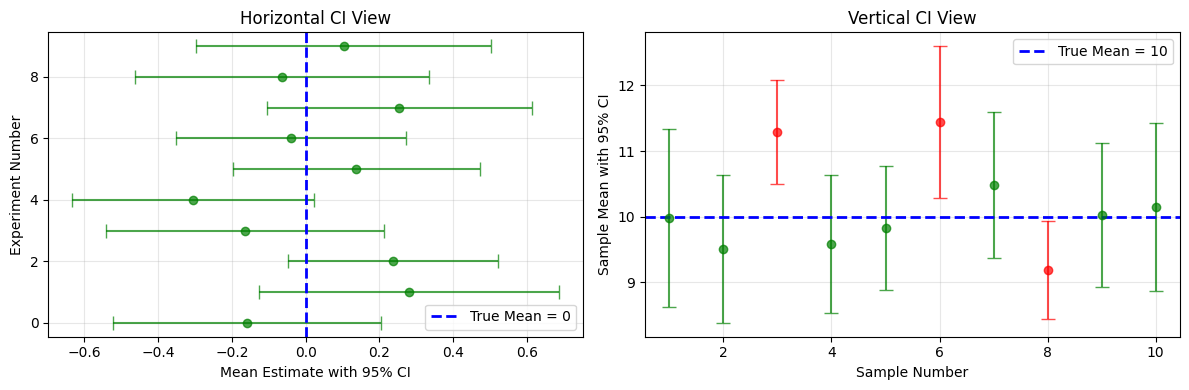


Method 1 Coverage: 10/10 = 100.0%
Method 2 Coverage: 7/10 = 70.0%
Expected coverage rate: 95.0%

Visualization Insights:
• Horizontal plot: Shows how CI width varies with sample variation
• Vertical plot: Shows how sample means vary around true population mean
• Green CIs: Successfully capture the true mean
• Red CIs: Miss the true mean (Type I error examples)
• Both should achieve ~95% coverage rate with enough experiments

Method 3: Effect of Sample Size on CI Width


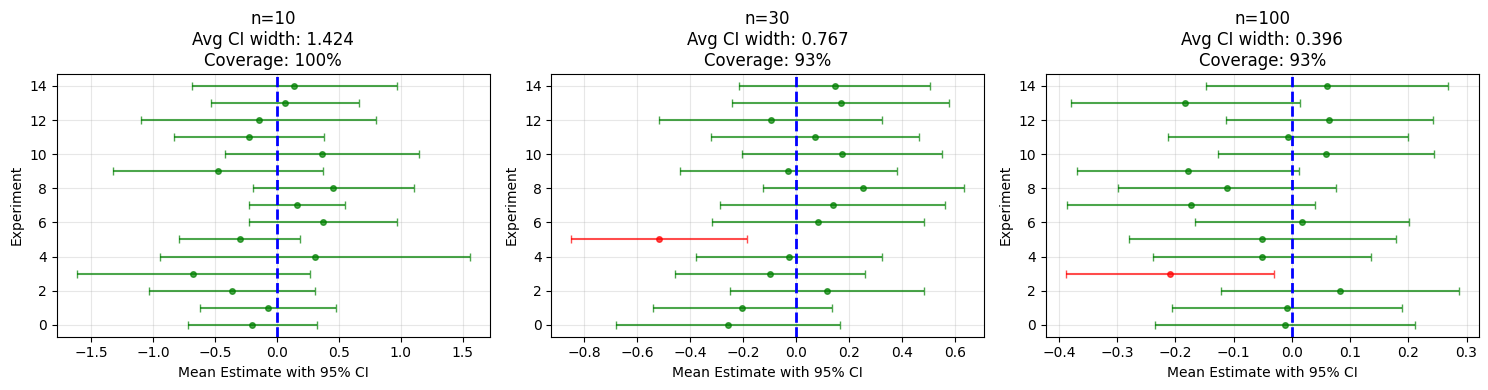


Key Insight: Larger samples → Narrower CIs → More precise estimates!


In [8]:
# Exercise 3: Confidence intervals visualization

print("=== CONFIDENCE INTERVALS DEMONSTRATION ===")

# Method 1: Vertical plot (your approach) - shows spread across experiments
print("Method 1: Horizontal CI Visualization")
true_mean = 0
n_samples = 30
n_experiments = 10

plt.figure(figsize=(12, 4))

# Your enhanced approach
plt.subplot(1, 2, 1)
covers_count = 0
for i in range(n_experiments):
    sample = np.random.normal(true_mean, 1, n_samples)
    mean_s = np.mean(sample)
    sem_s = stats.sem(sample)
    ci = stats.t.interval(0.95, n_samples-1, loc=mean_s, scale=sem_s)
    
    # Check coverage for color coding
    covers = ci[0] <= true_mean <= ci[1]
    if covers:
        covers_count += 1
    color = 'green' if covers else 'red'
    
    plt.errorbar(mean_s, i, xerr=[[mean_s - ci[0]], [ci[1] - mean_s]], 
                fmt='o', capsize=5, color=color, alpha=0.7)

plt.axvline(true_mean, color='blue', linestyle='--', linewidth=2, label=f'True Mean = {true_mean}')
plt.xlabel("Mean Estimate with 95% CI")
plt.ylabel("Experiment Number")
plt.title("Horizontal CI View")
plt.legend()
plt.grid(True, alpha=0.3)

# Method 2: Vertical plot (original) - shows variation across samples  
plt.subplot(1, 2, 2)
true_mean_2 = 10
sample_size = 30
confidence_level = 0.95
covers_true_mean = []

for i in range(n_experiments):
    sample = np.random.normal(true_mean_2, 3, sample_size)
    sample_mean = np.mean(sample)
    sem = stats.sem(sample)
    ci = stats.t.interval(confidence_level, len(sample)-1, loc=sample_mean, scale=sem)
    
    covers = ci[0] <= true_mean_2 <= ci[1]
    covers_true_mean.append(covers)
    color = 'green' if covers else 'red'
    
    plt.errorbar(i+1, sample_mean, 
                yerr=[[sample_mean-ci[0]], [ci[1]-sample_mean]], 
                fmt='o', color=color, capsize=5, alpha=0.7)

plt.axhline(y=true_mean_2, color='blue', linestyle='--', linewidth=2, label=f'True Mean = {true_mean_2}')
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean with 95% CI')
plt.title('Vertical CI View')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Enhanced analysis combining both methods
print(f"\nMethod 1 Coverage: {covers_count}/{n_experiments} = {100*covers_count/n_experiments:.1f}%")
coverage_rate = np.mean(covers_true_mean)
print(f"Method 2 Coverage: {sum(covers_true_mean)}/{n_experiments} = {coverage_rate:.1%}")
print(f"Expected coverage rate: {confidence_level:.1%}")

print("\n" + "="*50)
print("Visualization Insights:")
print("• Horizontal plot: Shows how CI width varies with sample variation")
print("• Vertical plot: Shows how sample means vary around true population mean")
print("• Green CIs: Successfully capture the true mean")
print("• Red CIs: Miss the true mean (Type I error examples)")
print("• Both should achieve ~95% coverage rate with enough experiments")

# Method 3: Enhanced comparison with different sample sizes
print("\nMethod 3: Effect of Sample Size on CI Width")
sample_sizes = [10, 30, 100]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, n in enumerate(sample_sizes):
    covers_count = 0
    ci_widths = []
    
    for i in range(15):  # More experiments for better visualization
        sample = np.random.normal(0, 1, n)
        mean_s = np.mean(sample)
        sem_s = stats.sem(sample)
        ci = stats.t.interval(0.95, n-1, loc=mean_s, scale=sem_s)
        
        ci_width = ci[1] - ci[0]
        ci_widths.append(ci_width)
        
        covers = ci[0] <= 0 <= ci[1]
        if covers:
            covers_count += 1
        color = 'green' if covers else 'red'
        
        axes[idx].errorbar(mean_s, i, xerr=[[mean_s - ci[0]], [ci[1] - mean_s]], 
                          fmt='o', capsize=3, color=color, alpha=0.7, markersize=4)
    
    axes[idx].axvline(0, color='blue', linestyle='--', linewidth=2)
    axes[idx].set_xlabel("Mean Estimate with 95% CI")
    axes[idx].set_ylabel("Experiment")
    axes[idx].set_title(f'n={n}\nAvg CI width: {np.mean(ci_widths):.3f}\nCoverage: {100*covers_count/15:.0f}%')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight: Larger samples → Narrower CIs → More precise estimates!")

## ✅ Summary
- You simulated various probability distributions and observed their properties.
- You performed hypothesis testing and interpreted p-values.
- You calculated confidence intervals, linking estimation to uncertainty.

**Next Notebook:** Linear Algebra Essentials for ML.